<a href="https://colab.research.google.com/github/larregui/BigDataAnalytics/blob/main/Larregui_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Predictive Model for Los Angeles Dodgers Promotion and Attendance (Python)

# BASED ON EXHIBIT 2.1 FROM MILLER (2015)

# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# read in Dodgers bobbleheads data and create data frame
dodgers = pd.read_csv("/content/dodgers.csv")

# examine the structure of the data frame
print("\nContents of dodgers data frame ---------------")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# print the first five rows of the data frame
print(pd.DataFrame.head(dodgers))
dodgerDF = pd.DataFrame(dodgers)

mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))



Contents of dodgers data frame ---------------
  month  day  attend day_of_week  ... shirt  fireworks bobblehead attend_000
0   APR   10   56000     Tuesday  ...    NO         NO         NO     56.000
1   APR   11   29729   Wednesday  ...    NO         NO         NO     29.729
2   APR   12   28328    Thursday  ...    NO         NO         NO     28.328
3   APR   13   31601      Friday  ...    NO        YES         NO     31.601
4   APR   14   46549    Saturday  ...    NO         NO         NO     46.549

[5 rows x 13 columns]


In [23]:
# ORDERING DATA

# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)

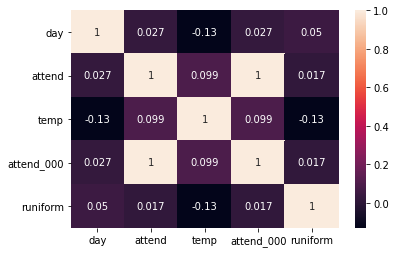

In [25]:
corrMatrix = dodgers.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
train = dodgers[dodgers['runiform'] >= 0.33]
test = dodgers[dodgers['runiform'] < 0.33]

# Model 1
my_model = str('attend ~ ordered_month + ordered_day_of_week + skies +bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

train['predict_attend'] = train_model_fit.fittedvalues

test['predict_attend'] = train_model_fit.predict(test)

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     5.397
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.00e-05
Time:                        14:24:09   Log-Likelihood:                -566.60
No. Observations:                  57   AIC:                             1163.
Df Residuals:                      42   BIC:                             1194.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
#Using full dataset
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     5.968
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           2.17e-07
Time:                        14:24:12   Log-Likelihood:                -812.22
No. Observations:                  81   AIC:                             1654.
Df Residuals:                      66   BIC:                             1690.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [21]:
#Add set column 
test['set']='Test'
train['set']='Train'

#combine datasets
combo = test.append(train, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


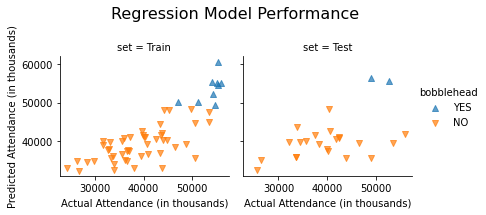

In [22]:
g = sns.FacetGrid(combo, col="set", hue="bobblehead", 
                  hue_order=["YES", "NO"],
                  #reorder col
                  col_order=["Train","Test"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "attend", "predict_attend",
      alpha=.7).set_axis_labels("Actual Attendance (in thousands)",
                                "Predicted Attendance (in thousands)")
g.add_legend();
plt.subplots_adjust(top=0.75)
g.fig.suptitle('Regression Model Performance', fontsize = 16)
plt.show()
